# Project 4

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import numpy as np

We begin by importing the datasets in pandas dataframes. We then look at the mean values and standard deviations of the parameters of the two datasets to try to understand which parameters can help us the most in our analysis.

In [2]:
gamma_dataframe = pd.read_csv('emc_gam.txt')
neutron_dataframe = pd.read_csv('emc_neutron.txt')
gamma_description = gamma_dataframe.describe()
gamma_description

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,4.336000e+04,43360.000000
mean,80.749479,-0.410604,2.902359,19.744211,1.022163,1.967300,0.716676,0.963544,0.968002,2.808279e-03,0.482873
std,46.762866,103.996747,1.179884,5.893862,0.154851,0.900559,0.140513,0.036491,0.023344,4.033629e-03,0.244087
min,0.595195,-179.986000,0.025090,1.000000,1.000000,0.014021,0.224754,0.436667,0.350785,1.054230e-50,0.000000
25%,40.473675,-90.818675,1.905425,16.000000,1.000000,1.232017,0.620547,0.960356,0.966239,1.281237e-03,0.288124
50%,79.210700,-0.410285,2.895825,20.000000,1.000000,1.882490,0.754330,0.968749,0.972596,2.097985e-03,0.384048
75%,119.839750,88.966775,3.916097,24.000000,1.000000,2.640420,0.826166,0.976497,0.977766,3.251785e-03,0.700759
max,163.211000,179.958000,5.234740,47.000000,6.000000,4.369720,1.000000,1.000000,1.000000,3.341460e-01,0.996175


In [3]:
neutron_description = neutron_dataframe.describe()
neutron_description

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000
mean,78.625170,0.705105,0.760000,13.929376,1.122564,0.341868,0.612911,0.893528,0.809153,0.034600,0.769180
std,47.212387,103.985196,0.502411,8.012129,0.381821,0.229777,0.176559,0.101082,0.209241,0.056912,0.276143
min,0.499105,-180.001000,0.024076,1.000000,1.000000,0.006992,0.171400,0.356098,0.000000,0.000000,0.000000
25%,37.196675,-89.329050,0.366767,8.000000,1.000000,0.168263,0.477409,0.838244,0.780413,0.007268,0.649031
50%,76.319900,1.788705,0.666409,13.000000,1.000000,0.299559,0.595015,0.916345,0.879204,0.016139,0.899504
75%,118.370000,90.577475,1.054273,19.000000,1.000000,0.467397,0.735480,0.976849,0.934041,0.034914,0.973680
max,178.647000,180.000000,3.832530,60.000000,6.000000,2.533030,1.000000,1.000000,1.000000,0.779841,0.999937


The parameters we are interested in are the ones which are more different from one dataset to the other. For example we can see that the mean energy of the photons is much greater than the energy of the neutron. On the opposite, the angles do not seem to convey much information since they both range from the same minimum to the same maximum value, with mean 0. To apply this criterion more accurately, we can study the difference between the mean values normalized by the standard deviation. For the total standard deviation we combine the single variances. We can then study the variable
$$
\frac{\mu_1 - \mu_2}{\sqrt{\sigma_1^2 + \sigma_2^2}}
$$
The bigger this variable is, the more the parameter is relevant to our analysis.

In [40]:
pars = (neutron_description.loc['mean'] - gamma_description.loc['mean']) / (neutron_description.loc['std']**2 + gamma_description.loc['std']**2)**0.5
pars.sort_values()

E1        -1.748885
E         -1.670589
Z20       -0.754483
E9E25     -0.651518
NrHits    -0.584614
E1E9      -0.459853
Th        -0.031968
Ph         0.007586
NrBumps    0.243675
Z53        0.557208
LatMom     0.776835
dtype: float64

We can see that the five most relevant parameters are $E_1, E, Z_{20}, E_9E_{25}$ and NrHits. However, some of this parameters may convey the same information twice. If this is the case, using only one parameter would convey the same information with less chance of overfitting our model. Thus, it is a good idea to study the correlation matrix of the parameters.

In [4]:
neutron_dataframe[['E', 'E1', 'Z20', 'E9E25', 'NrHits']].corr()

,E,E1,Z20,E9E25,NrHits
E,1.000000,0.819236,0.173279,-0.276649,0.718451
E1,0.819236,1.000000,0.302764,0.037483,0.426788
Z20,0.173279,0.302764,1.000000,0.109399,-0.173155
E9E25,-0.276649,0.037483,0.109399,1.000000,-0.410245
NrHits,0.718451,0.426788,-0.173155,-0.410245,1.000000


We immediately notice than there is a high correlation between $E$ and $E_1$.

We can try to visualize the data in some plots to better understand them.

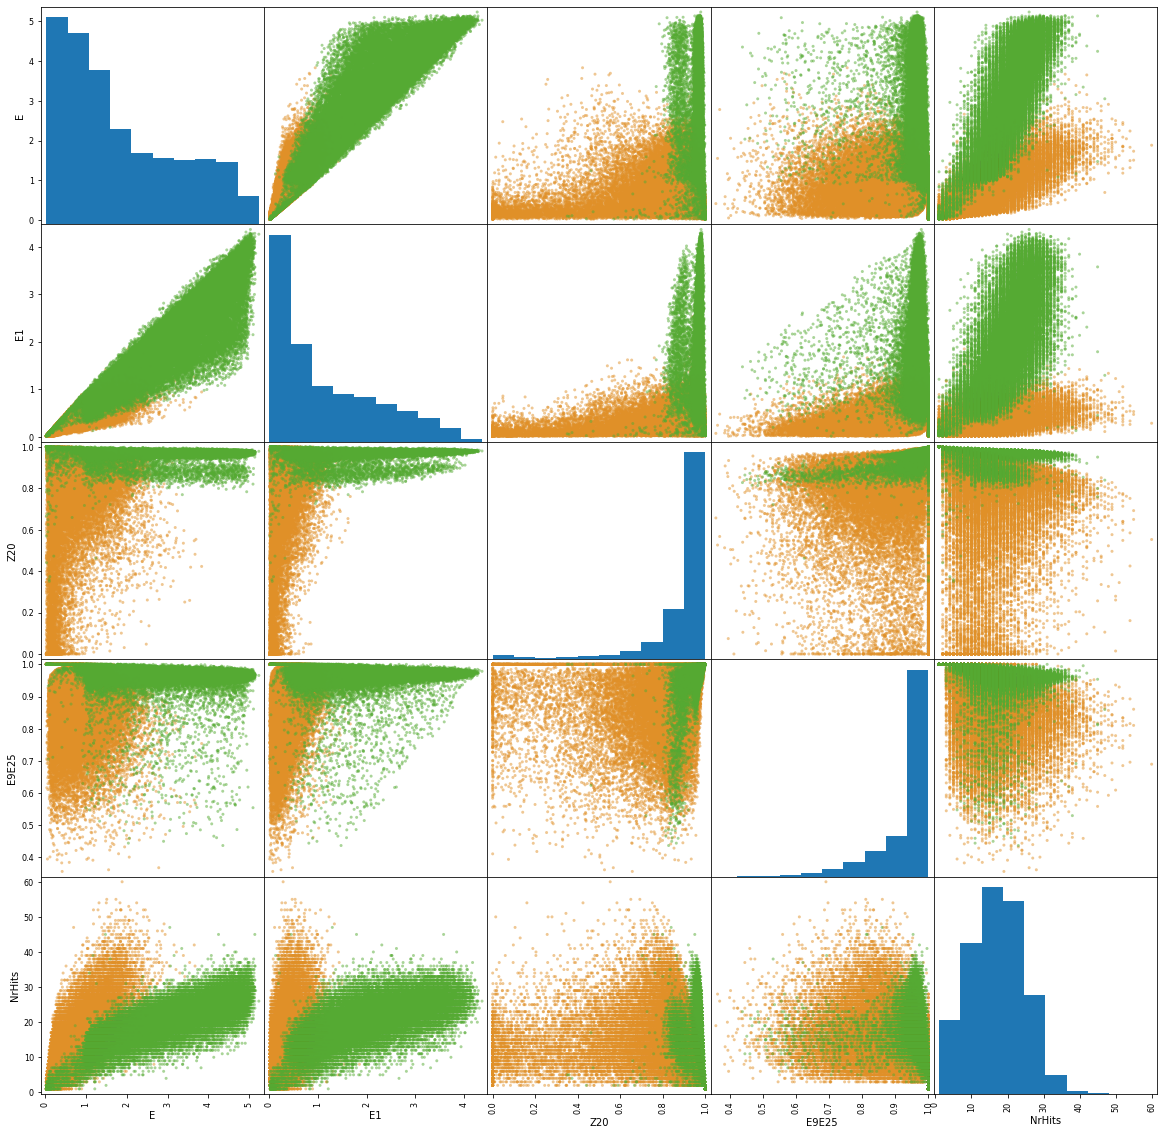

In [6]:
neutron_dataframe['Gamma'] = 0
gamma_dataframe['Gamma'] = 1
dataframe = pd.concat([neutron_dataframe, gamma_dataframe])

colors = ['#e09028', '#55aa33']     # orange for neutrons and green for photons
_ = pd.plotting.scatter_matrix(dataframe[['E', 'E1', 'Z20', 'E9E25', 'NrHits']], figsize=(20,20), color=[colors[x] for x in list(dataframe.Gamma)])

As we expected, all parameters 

In [27]:
def FOM(prediction, reality):
    signal = np.sum((prediction + reality) == 2)       # number of correctly identified photons
    background = np.sum(prediction) - signal          # number of neutrons identified as photons

    return signal / np.sqrt(signal + background)

def fit_data(X, y, classifier, test_size = 0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)
    classifier.fit(X_train, y_train)
    y_prediction = classifier.predict(X_test)

    fom = FOM(y_prediction, y_test)

    return y_prediction, fom

def fit_data_parameters(dataframe, parameters, classifier, test_size=0.5):
    X = dataframe[parameters]
    y = dataframe['Gamma']

    return fit_data(X, y, classifier, test_size)

Before starting to train our models, it useful to compute the fom in some simple cases. This will help us to evaluate the quality of our models. We can compute the fom in three cases:
- worst case scenario: we randomly decide if a particle is a photon or a neutron
- simple analysis: we identify a particle as a photon is its energy is greater than ($\overline{E}_{\gamma} + \overline{E}_n) / 2$
- perfect scenario: all the photons are identified and no neutron is selected

In [30]:
random_selection = np.random.randint(0, 2, len(dataframe))
random_fom = FOM(random_selection, dataframe['Gamma'])

mean_gamma_energy = gamma_dataframe.E.mean()
mean_neutron_energy = neutron_dataframe.E.mean()
energy_threshold = (mean_gamma_energy + mean_neutron_energy) / 2

simple_selection = np.array(dataframe['E'] > energy_threshold)
simple_fom = FOM(simple_selection, dataframe['Gamma'])

perfect_fom = FOM(dataframe['Gamma'], dataframe['Gamma'])

print(' Random selection: ', random_fom, '\n',
      'Simple selection: ', simple_fom, '\n',
      'Perfect selection: ', perfect_fom)

 Random selection:  103.59942307870415 
 Simple selection:  178.56169896528414 
 Perfect selection:  208.2306413571259


This mean that every model which returns a FOM smaller than 103 performs worse than a random model. Every model which returns a FOM smaller than 178 is useless too, since a simpler approach returns better results. We should aim to FOMs greater than 178 and as close as possible to 208.

In [32]:
knn = neighbors.KNeighborsClassifier(2)
pars = ['E', 'Z20', 'E9E25', 'NrHits']

knn_result = fit_data_parameters(dataframe, pars, knn)

print(knn_result[1])

141.09778468781946
